In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats
from sklearn.metrics import confusion_matrix
import ast

In [2]:
train_accuracies = []
validation_accuracies = []

train = pd.read_csv('/home/aalmansour/source/lidc_slices/MNIST/four_raters/MC_dropout30/train_accuracies.csv')
val = pd.read_csv('/home/aalmansour/source/lidc_slices/MNIST/four_raters/MC_dropout30/val_accuracies.csv')

In [3]:
test_accuracies = []
test = pd.read_csv('/home/aalmansour/source/lidc_slices/MNIST/four_raters/MC_dropout30/test_accuracies.csv')
for i in range(len(test)):
    accuracy = test.loc[i, 'Accuracy']
    test_accuracies.append(accuracy)
print(test_accuracies)

[0.5452222222222223]


In [4]:
for i in range(len(train)):
    accuracy = train.loc[i, 'Accuracy']
    train_accuracies.append(accuracy)

for i in range(len(val)):
    accuracy = val.loc[i, 'Accuracy']
    validation_accuracies.append(accuracy)

In [5]:
print(train_accuracies)
print(validation_accuracies)

[0.5715119047619047, 0.5979821428571429, 0.6054404761904761, 0.6083035714285714, 0.6097202380952381, 0.6103511904761905, 0.6100952380952381, 0.6100059523809523, 0.6094107142857143, 0.6084821428571429, 0.6089285714285714, 0.6076428571428572, 0.6068035714285714, 0.6059345238095238, 0.6057678571428572, 0.605279761904762, 0.6056309523809524, 0.6035059523809524, 0.6038154761904762, 0.602375, 0.6031369047619047, 0.602547619047619, 0.6013809523809523, 0.6023869047619047, 0.6013571428571428, 0.6009702380952381, 0.6007261904761905, 0.5995297619047619, 0.5999821428571429, 0.599827380952381, 0.5997202380952381, 0.5991666666666666, 0.5993452380952381, 0.5980059523809523, 0.5981011904761905, 0.5988630952380952, 0.598, 0.597297619047619, 0.5981011904761905, 0.5973571428571428, 0.5981369047619047, 0.5965059523809524, 0.5966607142857143, 0.5963214285714286, 0.5965, 0.5968511904761905, 0.5960297619047619, 0.5968333333333333, 0.5953273809523809, 0.5950952380952381]
[0.5930277777777778, 0.598027777777777

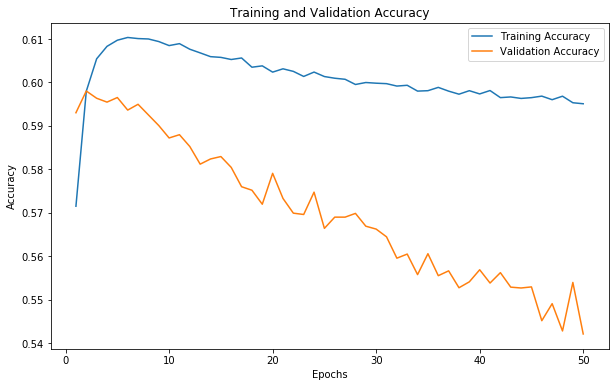

In [6]:
# Create a list of epochs for the x-axis (e.g., [1, 2, 3, 4, 5])
epochs = list(range(1, len(train_accuracies) + 1))

# Plot the training and validation accuracies
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_accuracies,  label='Training Accuracy')
plt.plot(epochs, validation_accuracies,  label='Validation Accuracy')

# Add labels and a legend
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Set custom x-axis ticks and labels
#plt.xticks(epochs)

# Set y-axis labels with only two decimal places
#plt.gca().yaxis.set_major_formatter('{:.2f}'.format)

# Show the plot
#plt.grid(True)
plt.show()

In [7]:
def mode_or_mean(series):
    modes = scipy.stats.mode(series)
    return modes.mode[0] if modes.count[0] > 1 else series.mean()

In [8]:
# Define a function to calculate accuracy
def calculate_accuracy(group):
    correct_predictions = (round(group['Label']) == round(group['Predicted Label'])).sum()
    total_predictions = len(group)
    accuracy = correct_predictions / total_predictions
    return accuracy

In [9]:
def calculate_RMS(group_per_label_lst):
    # Flatten the 'list_values' column into a single list
    flattened_list = [item for sublist in group_per_label_lst for item in sublist]
    #print("list: ", flattened_list)
    # Square every element in the flattened list
    squared_list = [x ** 2 for x in flattened_list]
    #print("squared: ", squared_list)
    # Sum every item in the squared list
    sum_of_squared_list = sum(squared_list)
    #print("sum: ",sum_of_squared_list)
    # take the mean of the squared list
    mean_of_squared_lst = sum_of_squared_list/len(squared_list)
    #print("mean: ",mean_of_squared_lst)
    # take the square root of mean_of_squared_lst
    square_root_result = np.sqrt(mean_of_squared_lst)
    #print("sqrt: ",square_root_result)

    return round(square_root_result,2)

In [10]:
train_prediction = pd.read_csv('/home/aalmansour/source/lidc_slices/MNIST/four_raters/MC_dropout30/train_predictions.csv')
train_prediction = train_prediction.tail(168000).reset_index(drop=True) #No Overlap Split
train_prediction.head()

,instance_id,Predicted Label
0,93931,3
1,51489,3
2,47300,3
3,200132,1
4,123607,3


In [11]:
val_prediction = pd.read_csv('/home/aalmansour/source/lidc_slices/MNIST/four_raters/MC_dropout30/val_predictions.csv')
val_prediction = val_prediction.tail(36000).reset_index(drop=True) #No Overlap Split
val_prediction.head()

,instance_id,Predicted Label
0,226121,5
1,136643,6
2,200291,9
3,66901,1
4,96254,9


In [12]:
test_prediction = pd.read_csv('/home/aalmansour/source/lidc_slices/MNIST/four_raters/MC_dropout30/test_predictions.csv')
len(test_prediction)

36000

In [13]:
full_train = pd.read_csv('/home/aalmansour/source/lidc_slices/MNIST/four_raters/full_train_data.csv')
full_val = pd.read_csv('/home/aalmansour/source/lidc_slices/MNIST/four_raters/full_validation_data.csv')
full_test= pd.read_csv('/home/aalmansour/source/lidc_slices/MNIST/four_raters/full_test_data.csv')
high_train = pd.read_csv('/home/aalmansour/source/lidc_slices/MNIST/four_raters/high_train_data.csv')
high_val = pd.read_csv('/home/aalmansour/source/lidc_slices/MNIST/four_raters/high_validation_data.csv')
high_test = pd.read_csv('/home/aalmansour/source/lidc_slices/MNIST/four_raters/high_test_data.csv')
low_train = pd.read_csv('/home/aalmansour/source/lidc_slices/MNIST/four_raters/low_train_data.csv')
low_val = pd.read_csv('/home/aalmansour/source/lidc_slices/MNIST/four_raters/low_validation_data.csv')
low_test = pd.read_csv('/home/aalmansour/source/lidc_slices/MNIST/four_raters/low_test_data.csv')
no_train = pd.read_csv('/home/aalmansour/source/lidc_slices/MNIST/four_raters/no_train_data.csv')
no_val = pd.read_csv('/home/aalmansour/source/lidc_slices/MNIST/four_raters/no_validation_data.csv')
no_test = pd.read_csv('/home/aalmansour/source/lidc_slices/MNIST/four_raters/no_test_data.csv')

original = pd.concat([full_train, full_val, full_test, high_train, high_val, high_test, low_train, low_val, low_test, no_train, no_val, no_test], axis=0, ignore_index=True)

In [14]:
original.head()

,image_id,flattened_image,Label,agreement,instance_id
0,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3,3,1
1,2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",7,3,2
2,4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",9,3,4
3,5,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",6,3,5
4,6,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4,3,6


In [15]:
print(len(full_train['image_id'].unique()))
print(len(full_val['image_id'].unique()))
print(len(full_test['image_id'].unique()))
print(len(high_train['image_id'].unique()))
print(len(high_val['image_id'].unique()))
print(len(high_test['image_id'].unique()))
print(len(low_train['image_id'].unique()))
print(len(low_val['image_id'].unique()))
print(len(low_test['image_id'].unique()))
print(len(no_train['image_id'].unique()))
print(len(no_val['image_id'].unique()))
print(len(no_test['image_id'].unique()))

10500
2250
2250
10500
2250
2250
10500
2250
2250
10500
2250
2250


In [16]:
len(original['image_id'].unique())

60000

In [17]:
original['Label'].unique()

array([3, 7, 9, 6, 4, 1, 5, 8, 2, 0])

In [18]:
merged_df1 = pd.merge(original, train_prediction, on='instance_id', how='inner')
len(merged_df1)

168000

In [19]:
display(merged_df1)

,image_id,flattened_image,Label,agreement,instance_id,Predicted Label
0,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3,3,1,3
1,2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",7,3,2,7
2,4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",9,3,4,9
3,5,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",6,3,5,6
4,6,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4,3,6,4
...,...,...,...,...,...,...
167995,59994,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3,0,239994,3
167996,59996,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",6,0,239996,8
167997,59997,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",5,0,239997,7
167998,59998,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",5,0,239998,6


In [20]:
# Calculate the mean predicted_label for each nodule_id group 
# Training set:
group_by_nodule_id1 = merged_df1.groupby(['image_id']).agg({
    'Label': mode_or_mean,
    'agreement': 'first',
    'Predicted Label': mode_or_mean
}).reset_index()

# Print the result
print(len(group_by_nodule_id1))
#display(group_by_nodule_id1)

<ipython-input-7-d109c88bafe0>:2: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  modes = scipy.stats.mode(series)


42000


In [21]:
calculate_accuracy(group_by_nodule_id1)

0.7640476190476191

In [22]:
val_prediction = pd.read_csv('/home/aalmansour/source/lidc_slices/MNIST/four_raters/MC_dropout30/val_predictions.csv')
val_prediction = val_prediction.tail(36000).reset_index(drop=True)

In [23]:
merged_df2 = pd.merge(original, val_prediction, on='instance_id', how='inner')
len(merged_df2)

36000

In [24]:
group_by_nodule_id2 = merged_df2.groupby(['image_id']).agg({
    'Label': mode_or_mean,
    'agreement': 'first',
    'Predicted Label': mode_or_mean
}).reset_index()

# Print the result
print(len(group_by_nodule_id2))
display(group_by_nodule_id2)

<ipython-input-7-d109c88bafe0>:2: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  modes = scipy.stats.mode(series)


9000


,image_id,Label,agreement,Predicted Label
0,3,3.00,3,3
1,9,7.00,3,7
2,18,7.00,3,7
3,21,5.00,3,5
4,30,8.00,3,8
...,...,...,...,...
8995,59969,4.50,0,1
8996,59984,4.50,0,7
8997,59990,5.75,0,8
8998,59992,4.50,0,6


In [25]:
#Validation Set: 
calculate_accuracy(group_by_nodule_id2)

0.6665555555555556

In [26]:
test_prediction = pd.read_csv('/home/aalmansour/source/lidc_slices/MNIST/four_raters/MC_dropout30/test_predictions.csv')
test_prediction.head()
len(test_prediction)

36000

In [27]:
merged_df3 = pd.merge(original, test_prediction, on='instance_id', how='inner')
len(merged_df3)

36000

In [28]:
class_counts1 = merged_df1['agreement'].value_counts()
class_counts2 = merged_df2['agreement'].value_counts()
class_counts3 = merged_df3['agreement'].value_counts()

print(class_counts1)
print(class_counts2)
print(class_counts3)

agreement
3    42000
2    42000
1    42000
0    42000
Name: count, dtype: int64
agreement
3    9000
2    9000
1    9000
0    9000
Name: count, dtype: int64
agreement
3    9000
2    9000
1    9000
0    9000
Name: count, dtype: int64


In [29]:
group_by_nodule_id3 = merged_df3.groupby(['image_id']).agg({
    'Label': mode_or_mean,
    'agreement': 'first',
    'Predicted Label': mode_or_mean
}).reset_index()

# Print the result
print(len(group_by_nodule_id3))
display(group_by_nodule_id3)

<ipython-input-7-d109c88bafe0>:2: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  modes = scipy.stats.mode(series)


9000


,image_id,Label,agreement,Predicted Label
0,10,0.00,3,0
1,11,9.00,3,9
2,24,6.00,3,6
3,32,1.00,3,1
4,34,6.00,3,6
...,...,...,...,...
8995,59954,5.00,0,9
8996,59957,6.00,0,9
8997,59976,7.00,0,9
8998,59991,5.50,0,2


In [30]:
#Test Set: 
calculate_accuracy(group_by_nodule_id3)

0.6741111111111111

In [31]:
# Group the train, validation, and test set by 'agreement' column
grouped1 = merged_df1.groupby('agreement') # train
grouped2 = merged_df2.groupby('agreement') # validation
grouped3 = merged_df3.groupby('agreement') # test

In [32]:
print(grouped1)

In [33]:
# Calculate accuracy for each group
group_accuracies1 = grouped1.apply(calculate_accuracy)
group_accuracies2 = grouped2.apply(calculate_accuracy)
group_accuracies3 = grouped3.apply(calculate_accuracy)

In [34]:
# Print the accuracies for each group
print(round(group_accuracies1,4)*100)

agreement
0    21.63
1    44.55
2    72.30
3    99.55
dtype: float64


In [35]:
print(round(group_accuracies2,4)*100)

agreement
0    22.59
1    43.20
2    64.83
3    86.22
dtype: float64


In [36]:
print(round(group_accuracies3,4)*100)

agreement
0    22.76
1    43.87
2    65.24
3    87.47
dtype: float64


In [37]:
train_uncert = []
validation_uncert = []
test_uncert = []

train_un = pd.read_csv('/home/aalmansour/source/lidc_slices/MNIST/four_raters/MC_dropout30/train_uncertainty_stats.csv')
val_un = pd.read_csv('/home/aalmansour/source/lidc_slices/MNIST/four_raters/MC_dropout30/val_uncertainty_stats.csv')
test_un = pd.read_csv('/home/aalmansour/source/lidc_slices/MNIST/four_raters/MC_dropout30/test_uncertainty_stats.csv')

In [38]:
display(train_un)

,instance_id,True_Label,Mean_Prediction,Prediction_STD,Difference_T-P,all_sample_predictions_std,all_sample_predictions100
0,185,10,8.46,2.021979,1.54,2.021979,"[9, 9, 9, 1, 9, 9, 9, 9, 9, 0, 9, 9, 9, 9, 9, ..."
1,12388,6,5.00,0.000000,1.00,0.000000,"[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ..."
2,209128,9,6.53,2.238102,2.47,2.238102,"[8, 8, 3, 7, 1, 8, 8, 8, 7, 8, 8, 7, 8, 8, 7, ..."
3,69892,8,7.00,0.000000,1.00,0.000000,"[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, ..."
4,3216,10,9.00,0.000000,1.00,0.000000,"[9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, ..."
...,...,...,...,...,...,...,...
167995,120399,2,1.72,2.267510,0.28,2.267510,"[9, 1, 1, 5, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, ..."
167996,103211,5,4.06,0.237487,0.94,0.237487,"[4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, ..."
167997,47483,2,1.06,0.596992,0.94,0.596992,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, ..."
167998,93985,5,4.00,0.000000,1.00,0.000000,"[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ..."


In [39]:
print(type(train_un['all_sample_predictions100'][0]))

<class 'str'>


In [40]:
merged_train_un = pd.merge(original, train_un, on='instance_id', how='inner')
merged_val_un = pd.merge(original, val_un, on='instance_id', how='inner')
merged_test_un = pd.merge(original, test_un, on='instance_id', how='inner')

In [41]:
# Convert the entire column from string to list
merged_train_un['all_sample_predictions100'] = merged_train_un['all_sample_predictions100'].apply(ast.literal_eval)
merged_val_un['all_sample_predictions100'] = merged_val_un['all_sample_predictions100'].apply(ast.literal_eval)
merged_test_un['all_sample_predictions100'] = merged_test_un['all_sample_predictions100'].apply(ast.literal_eval)


In [42]:
def calculate_residuals(true, lst):
    #lst = ast.literal_eval(lst_str)
    return [true - val for val in lst]

In [43]:
#merged_train_un = pd.merge(original, train_un, on='instance_id', how='inner')
merged_train_un['residuals'] = merged_train_un.apply(lambda row: calculate_residuals(row['True_Label'], row['all_sample_predictions100']), axis=1)
display(merged_train_un)

,image_id,flattened_image,Label,agreement,instance_id,True_Label,Mean_Prediction,Prediction_STD,Difference_T-P,all_sample_predictions_std,all_sample_predictions100,residuals
0,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3,3,1,4,3.00,0.000000,1.00,0.000000,"[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1,2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",7,3,2,8,7.00,0.000000,1.00,0.000000,"[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
2,4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",9,3,4,10,9.00,0.000000,1.00,0.000000,"[9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
3,5,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",6,3,5,7,5.91,0.567362,1.09,0.567362,"[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
4,6,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4,3,6,5,4.00,0.000000,1.00,0.000000,"[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
167995,59994,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3,0,239994,4,5.41,3.749920,-1.41,3.749920,"[9, 3, 9, 9, 0, 9, 0, 9, 9, 2, 3, 3, 9, 0, 9, ...","[-5, 1, -5, -5, 4, -5, 4, -5, -5, 2, 1, 1, -5,..."
167996,59996,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",6,0,239996,7,7.81,0.757562,-0.81,0.757562,"[8, 8, 8, 8, 5, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, ...","[-1, -1, -1, -1, 2, -1, -1, -1, -1, -1, -1, -1..."
167997,59997,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",5,0,239997,6,8.53,0.953467,-2.53,0.953467,"[7, 7, 7, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, ...","[-1, -1, -1, -3, -3, -3, -3, -3, -3, -3, -3, -..."
167998,59998,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",5,0,239998,6,6.06,0.732393,-0.06,0.732393,"[6, 6, 6, 9, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, ...","[0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


In [44]:
# Create a cross-tabulation table showing mean and std for each combination of 'agreement' and 'label'
cross_tab = pd.crosstab(merged_train_un['Label'],merged_train_un['agreement'])

# Print the cross-tabulation table
print(cross_tab)

agreement     0     1     2     3
Label                            
0          4179  4170  4209  4120
1          4341  4441  4452  4724
2          4177  4230  4246  4148
3          4178  4244  4454  4156
4          4238  4156  4248  4020
5          4210  4034  3739  3976
6          4127  4131  3998  4168
7          4194  4354  4417  4252
8          4159  4048  4224  4100
9          4197  4192  4013  4336


In [45]:

merged_val_un['residuals'] = merged_val_un.apply(lambda row: calculate_residuals(row['True_Label'], row['all_sample_predictions100']), axis=1)
display(merged_val_un)

,image_id,flattened_image,Label,agreement,instance_id,True_Label,Mean_Prediction,Prediction_STD,Difference_T-P,all_sample_predictions_std,all_sample_predictions100,residuals
0,3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3,3,3,4,4.99,2.837235,-0.99,2.837235,"[5, 3, 3, 3, 9, 3, 1, 9, 3, 9, 9, 8, 3, 3, 9, ...","[-1, 1, 1, 1, -5, 1, 3, -5, 1, -5, -5, -4, 1, ..."
1,9,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",7,3,9,8,7.00,0.000000,1.00,0.000000,"[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
2,18,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",7,3,18,8,7.00,0.000000,1.00,0.000000,"[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
3,21,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",5,3,21,6,5.44,1.373463,0.56,1.373463,"[5, 5, 5, 8, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...","[1, 1, 1, -2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,..."
4,30,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",8,3,30,9,7.72,0.980612,1.28,0.980612,"[8, 8, 4, 4, 8, 8, 8, 8, 8, 8, 8, 4, 8, 8, 8, ...","[1, 1, 5, 5, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
35995,59969,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",6,0,239969,7,1.14,0.894651,5.86,0.894651,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, ..."
35996,59984,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,239984,1,6.88,0.682349,-5.88,0.682349,"[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, ...","[-6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -..."
35997,59990,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",6,0,239990,7,7.95,0.409268,-0.95,0.409268,"[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, ...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -..."
35998,59992,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",9,0,239992,10,4.48,1.846510,5.52,1.846510,"[6, 2, 6, 2, 6, 6, 2, 3, 2, 2, 3, 6, 3, 2, 6, ...","[4, 8, 4, 8, 4, 4, 8, 7, 8, 8, 7, 4, 7, 8, 4, ..."


In [46]:

merged_test_un['residuals'] = merged_test_un.apply(lambda row: calculate_residuals(row['True_Label'], row['all_sample_predictions100']), axis=1)
display(merged_test_un)

,image_id,flattened_image,Label,agreement,instance_id,True_Label,Mean_Prediction,Prediction_STD,Difference_T-P,all_sample_predictions_std,all_sample_predictions100,residuals
0,10,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,3,10,1,0.31,1.293793,0.69,1.293793,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1,11,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",9,3,11,10,8.88,0.652380,1.12,0.652380,"[9, 9, 9, 9, 9, 9, 9, 9, 8, 9, 9, 9, 9, 9, 9, ...","[1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, ..."
2,24,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",6,3,24,7,5.95,0.409268,1.05,0.409268,"[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
3,32,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,3,32,2,1.04,0.397995,0.96,0.397995,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
4,34,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",6,3,34,7,5.94,0.596992,1.06,0.596992,"[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
35995,59954,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,0,239954,2,8.78,1.082405,-6.78,1.082405,"[9, 9, 9, 9, 9, 9, 4, 9, 9, 9, 9, 9, 9, 9, 9, ...","[-7, -7, -7, -7, -7, -7, -2, -7, -7, -7, -7, -..."
35996,59957,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",6,0,239957,7,8.84,0.783837,-1.84,0.783837,"[9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, ...","[-2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -..."
35997,59976,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",5,0,239976,6,6.41,2.608045,-0.41,2.608045,"[7, 7, 3, 4, 7, 9, 7, 3, 3, 9, 9, 9, 9, 3, 3, ...","[-1, -1, 3, 2, -1, -3, -1, 3, 3, -3, -3, -3, -..."
35998,59991,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4,0,239991,5,2.05,0.497494,2.95,0.497494,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ..."


In [47]:
def calculate_mean_std(x):
    return round(np.mean(x.tolist()),2), np.median(x.tolist()), round(np.std(x.tolist()),2)

In [48]:
import numpy as np
lst = [1,2,3,4,5]
squared_list = [x ** 2 for x in lst]
sum_of_squared_list = sum(squared_list)
mean_of_squared_lst = sum_of_squared_list/len(squared_list)
square_root_result = np.sqrt(mean_of_squared_lst)
print(square_root_result)


3.3166247903554


In [49]:
# Create a cross-tabulation table
cross_tab = pd.crosstab(merged_train_un['Label'], merged_train_un['agreement'])

display(cross_tab)

agreement,0,1,2,3
Label,,,,
0,4179,4170,4209,4120
1,4341,4441,4452,4724
2,4177,4230,4246,4148
3,4178,4244,4454,4156
4,4238,4156,4248,4020
5,4210,4034,3739,3976
6,4127,4131,3998,4168
7,4194,4354,4417,4252
8,4159,4048,4224,4100


In [50]:
# Use pd.pivot_table to calculate the mean and std
result_table = pd.pivot_table(merged_train_un, values='all_sample_predictions100', index='Label', columns='agreement', aggfunc=calculate_mean_std)

# Print the result table
display(result_table)


agreement,0,1,2,3
Label,,,,
0,"(3.62, 3.0, 3.19)","(2.49, 1.0, 3.08)","(1.24, 0.0, 2.5)","(0.02, 0.0, 0.32)"
1,"(3.72, 3.0, 2.98)","(2.78, 1.0, 2.71)","(1.93, 1.0, 2.16)","(1.01, 1.0, 0.27)"
2,"(4.04, 3.0, 2.9)","(3.48, 2.0, 2.59)","(2.71, 2.0, 1.95)","(2.01, 2.0, 0.27)"
3,"(4.22, 3.0, 2.79)","(3.94, 3.0, 2.41)","(3.46, 3.0, 1.72)","(3.02, 3.0, 0.31)"
4,"(4.39, 4.0, 2.82)","(4.32, 4.0, 2.37)","(4.2, 4.0, 1.73)","(4.01, 4.0, 0.31)"
5,"(4.45, 5.0, 2.74)","(4.56, 5.0, 2.32)","(4.79, 5.0, 1.66)","(5.0, 5.0, 0.2)"
6,"(4.56, 5.0, 2.84)","(4.99, 6.0, 2.42)","(5.47, 6.0, 1.82)","(5.99, 6.0, 0.3)"
7,"(4.84, 6.0, 2.9)","(5.49, 7.0, 2.6)","(6.29, 7.0, 1.9)","(7.0, 7.0, 0.2)"
8,"(4.89, 5.0, 3.04)","(5.72, 7.0, 2.93)","(6.86, 8.0, 2.36)","(7.96, 8.0, 0.49)"


In [51]:
# Use pd.pivot_table to calculate the mean and std
result_table = pd.pivot_table(merged_train_un, values='residuals', index='Label', columns='agreement', aggfunc=calculate_RMS)

# Print the result table
display(result_table)

agreement,0,1,2,3
Label,,,,
0,4.13,3.42,2.51,1.03
1,3.45,2.82,2.16,1.02
2,3.08,2.64,1.97,1.02
3,2.80,2.41,1.81,1.03
4,2.89,2.47,1.90,1.04
5,3.15,2.73,2.05,1.02
6,3.74,3.15,2.38,1.06
7,4.29,3.62,2.56,1.03
8,5.11,4.40,3.18,1.15


In [52]:
# Use pd.pivot_table to calculate the mean and std
result_table = pd.pivot_table(merged_train_un, values='all_sample_predictions100', index='agreement', aggfunc=calculate_mean_std)

# Print the result table
display(result_table)

,all_sample_predictions100
agreement,
0,"(4.39, 4.0, 2.98)"
1,"(4.39, 4.0, 2.93)"
2,"(4.41, 4.0, 2.9)"
3,"(4.48, 4.0, 2.9)"


In [53]:
# Use pd.pivot_table to calculate the mean and std
result_table = pd.pivot_table(merged_train_un, values='residuals', index='agreement', aggfunc=calculate_RMS)

# Print the result table
display(result_table)

,residuals
agreement,
0,3.95
1,3.35
2,2.47
3,1.05


In [54]:
# Create a cross-tabulation table
cross_tab = pd.crosstab(merged_val_un['Label'], merged_val_un['agreement'])

print(cross_tab)

agreement    0    1    2    3
Label                        
0          852  903  884  920
1          940  911  896  996
2          858  890  896  928
3          910  910  938  920
4          888  834  845  920
5          851  842  910  696
6          935  947  992  932
7          935  909  907  984
8          921  927  892  848
9          910  927  840  856


In [55]:
# Use pd.pivot_table to calculate the mean and std
result_table = pd.pivot_table(merged_val_un, values='all_sample_predictions100', index='Label', columns='agreement', aggfunc=calculate_mean_std)

# Print the result table
display(result_table)

agreement,0,1,2,3
Label,,,,
0,"(3.68, 3.0, 3.09)","(2.85, 1.0, 3.2)","(1.68, 0.0, 2.76)","(0.59, 0.0, 1.8)"
1,"(3.97, 3.0, 3.0)","(2.8, 1.0, 2.73)","(2.29, 1.0, 2.45)","(1.39, 1.0, 1.47)"
2,"(3.97, 3.0, 2.82)","(3.76, 2.0, 2.72)","(3.26, 2.0, 2.48)","(2.62, 2.0, 1.82)"
3,"(4.44, 4.0, 2.77)","(3.9, 3.0, 2.45)","(3.78, 3.0, 2.15)","(3.52, 3.0, 1.74)"
4,"(4.46, 4.0, 2.78)","(4.29, 4.0, 2.48)","(4.26, 4.0, 2.21)","(4.29, 4.0, 1.68)"
5,"(4.43, 5.0, 2.85)","(4.68, 5.0, 2.4)","(4.77, 5.0, 2.0)","(4.92, 5.0, 1.52)"
6,"(4.72, 6.0, 2.77)","(4.9, 6.0, 2.5)","(5.3, 6.0, 2.0)","(5.67, 6.0, 1.33)"
7,"(4.84, 5.0, 2.83)","(5.54, 7.0, 2.66)","(6.15, 7.0, 2.15)","(6.49, 7.0, 1.75)"
8,"(4.67, 5.0, 3.0)","(5.32, 6.0, 3.0)","(6.19, 8.0, 2.67)","(7.08, 8.0, 2.14)"


In [56]:
# Use pd.pivot_table to calculate the mean and std
result_table = pd.pivot_table(merged_val_un, values='residuals', index='Label', columns='agreement', aggfunc=calculate_RMS)

# Print the result table
display(result_table)

agreement,0,1,2,3
Label,,,,
0,4.09,3.70,2.84,1.85
1,3.58,2.85,2.47,1.59
2,2.99,2.83,2.49,1.86
3,2.81,2.45,2.16,1.81
4,2.83,2.58,2.33,1.82
5,3.25,2.74,2.34,1.86
6,3.58,3.26,2.63,1.88
7,4.24,3.62,2.84,2.32
8,5.27,4.74,3.88,2.88


In [57]:
# Use pd.pivot_table to calculate the mean and std
result_table = pd.pivot_table(merged_val_un, values='all_sample_predictions100', index='agreement', aggfunc=calculate_mean_std)

# Print the result table
display(result_table)

,all_sample_predictions100
agreement,
0,"(4.42, 4.0, 2.93)"
1,"(4.43, 4.0, 2.94)"
2,"(4.49, 5.0, 2.91)"
3,"(4.42, 4.0, 2.94)"


In [58]:
# Use pd.pivot_table to calculate the mean and std
result_table = pd.pivot_table(merged_val_un, values='residuals', index='agreement', aggfunc=calculate_RMS)

# Print the result table
display(result_table)

,residuals
agreement,
0,4.01
1,3.49
2,2.84
3,2.06


In [59]:
# Create a cross-tabulation table
cross_tab = pd.crosstab(merged_test_un['Label'], merged_test_un['agreement'])

print(cross_tab)

agreement    0    1    2     3
Label                         
0          905  937  884   828
1          966  911  971  1100
2          842  831  932   904
3          915  930  816   904
4          871  909  833   856
5          927  788  906   716
6          921  927  883   856
7          867  914  962   992
8          882  928  931   944
9          904  925  882   900


In [60]:
# Use pd.pivot_table to calculate the mean and std
result_table = pd.pivot_table(merged_test_un, values='all_sample_predictions100', index='Label', columns='agreement', aggfunc=calculate_mean_std)

# Print the result table
display(result_table)

agreement,0,1,2,3
Label,,,,
0,"(3.63, 3.0, 3.13)","(2.72, 1.0, 3.17)","(1.74, 0.0, 2.81)","(0.57, 0.0, 1.77)"
1,"(3.69, 3.0, 2.93)","(3.1, 1.0, 2.85)","(2.1, 1.0, 2.31)","(1.36, 1.0, 1.41)"
2,"(3.95, 3.0, 2.83)","(3.66, 2.0, 2.77)","(3.1, 2.0, 2.34)","(2.64, 2.0, 1.81)"
3,"(4.09, 3.0, 2.84)","(3.96, 3.0, 2.51)","(3.71, 3.0, 2.16)","(3.42, 3.0, 1.64)"
4,"(4.19, 4.0, 2.8)","(4.43, 4.0, 2.52)","(4.33, 4.0, 2.16)","(4.22, 4.0, 1.69)"
5,"(4.36, 5.0, 2.83)","(4.7, 5.0, 2.54)","(4.91, 5.0, 2.0)","(4.97, 5.0, 1.41)"
6,"(4.6, 5.0, 2.77)","(5.05, 6.0, 2.44)","(5.23, 6.0, 2.09)","(5.6, 6.0, 1.49)"
7,"(4.57, 5.0, 2.97)","(5.5, 7.0, 2.64)","(6.14, 7.0, 2.08)","(6.64, 7.0, 1.61)"
8,"(4.72, 5.0, 3.02)","(5.68, 7.0, 2.9)","(6.19, 8.0, 2.77)","(6.96, 8.0, 2.28)"


In [61]:
# Use pd.pivot_table to calculate the mean and std
result_table = pd.pivot_table(merged_test_un, values='residuals', index='Label', columns='agreement', aggfunc=calculate_RMS)

# Print the result table
display(result_table)

agreement,0,1,2,3
Label,,,,
0,4.09,3.61,2.91,1.82
1,3.39,3.06,2.31,1.55
2,2.99,2.84,2.34,1.85
3,2.84,2.51,2.18,1.74
4,2.91,2.58,2.26,1.86
5,3.27,2.86,2.28,1.75
6,3.67,3.12,2.74,2.04
7,4.53,3.64,2.79,2.11
8,5.24,4.41,3.95,3.06


In [62]:
# Use pd.pivot_table to calculate the mean and std
result_table = pd.pivot_table(merged_test_un, values='all_sample_predictions100', index='agreement', aggfunc=calculate_mean_std)

# Print the result table
display(result_table)

,all_sample_predictions100
agreement,
0,"(4.26, 4.0, 2.96)"
1,"(4.5, 5.0, 2.98)"
2,"(4.47, 5.0, 2.94)"
3,"(4.44, 4.0, 2.96)"


In [63]:
result_table = pd.pivot_table(merged_test_un, values='residuals', index='agreement', aggfunc=calculate_RMS)

# Print the result table
display(result_table)

,residuals
agreement,
0,4.03
1,3.46
2,2.84
3,2.10


In [64]:
# Concatenate them vertically
stacked_df = pd.concat([merged_train_un, merged_val_un, merged_test_un], axis=0)

# Reset the index if needed
stacked_df.reset_index(drop=True, inplace=True)

# Print the stacked DataFrame
print(stacked_df)

        image_id                                    flattened_image  Label  \
0              1  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...      3   
1              2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...      7   
2              4  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...      9   
3              5  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...      6   
4              6  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...      4   
...          ...                                                ...    ...   
239995     59954  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...      1   
239996     59957  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...      6   
239997     59976  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...      5   
239998     59991  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...      4   
239999     60000  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...      5   

        agreement  instance_id  True_Label  Mean_Prediction  Pr

In [65]:
# Create a cross-tabulation table
cross_tab = pd.crosstab(stacked_df['Label'], stacked_df['agreement'])

print(cross_tab)

agreement     0     1     2     3
Label                            
0          5936  6010  5977  5868
1          6247  6263  6319  6820
2          5877  5951  6074  5980
3          6003  6084  6208  5980
4          5997  5899  5926  5796
5          5988  5664  5555  5388
6          5983  6005  5873  5956
7          5996  6177  6286  6228
8          5962  5903  6047  5892
9          6011  6044  5735  6092


In [66]:
# Use pd.pivot_table to calculate the mean and std
result_table = pd.pivot_table(stacked_df, values='all_sample_predictions100', index='Label', columns='agreement', aggfunc=calculate_mean_std)

# Print the result table
display(result_table)

agreement,0,1,2,3
Label,,,,
0,"(3.63, 3.0, 3.17)","(2.58, 1.0, 3.12)","(1.38, 0.0, 2.6)","(0.19, 0.0, 1.04)"
1,"(3.76, 3.0, 2.98)","(2.83, 1.0, 2.74)","(2.01, 1.0, 2.23)","(1.12, 1.0, 0.85)"
2,"(4.01, 3.0, 2.88)","(3.55, 2.0, 2.64)","(2.85, 2.0, 2.11)","(2.2, 2.0, 1.07)"
3,"(4.23, 4.0, 2.8)","(3.93, 3.0, 2.43)","(3.54, 3.0, 1.86)","(3.15, 3.0, 0.99)"
4,"(4.37, 4.0, 2.81)","(4.33, 4.0, 2.41)","(4.23, 4.0, 1.87)","(4.08, 4.0, 0.97)"
5,"(4.43, 5.0, 2.77)","(4.6, 5.0, 2.37)","(4.8, 5.0, 1.78)","(4.98, 5.0, 0.77)"
6,"(4.59, 5.0, 2.82)","(4.98, 6.0, 2.44)","(5.4, 6.0, 1.9)","(5.88, 6.0, 0.83)"
7,"(4.8, 5.0, 2.9)","(5.5, 7.0, 2.62)","(6.25, 7.0, 1.97)","(6.86, 7.0, 0.99)"
8,"(4.83, 5.0, 3.03)","(5.65, 7.0, 2.94)","(6.66, 8.0, 2.49)","(7.67, 8.0, 1.36)"


In [67]:
# Use pd.pivot_table to calculate the mean and std
result_table = pd.pivot_table(stacked_df, values='residuals', index='Label', columns='agreement', aggfunc=calculate_RMS)

# Print the result table
display(result_table)

agreement,0,1,2,3
Label,,,,
0,4.12,3.49,2.62,1.32
1,3.46,2.86,2.23,1.22
2,3.05,2.70,2.12,1.33
3,2.81,2.43,1.92,1.30
4,2.88,2.50,2.02,1.34
5,3.18,2.75,2.14,1.28
6,3.70,3.16,2.48,1.39
7,4.32,3.62,2.64,1.51
8,5.15,4.46,3.42,1.90


In [68]:
# Use pd.pivot_table to calculate the mean and std
result_table = pd.pivot_table(stacked_df, values='all_sample_predictions100', index='agreement', aggfunc=calculate_mean_std)

# Print the result table
display(result_table)

,all_sample_predictions100
agreement,
0,"(4.38, 4.0, 2.97)"
1,"(4.41, 4.0, 2.94)"
2,"(4.43, 4.0, 2.91)"
3,"(4.46, 4.0, 2.91)"


In [69]:
result_table = pd.pivot_table(stacked_df, values='residuals', index='agreement', aggfunc=calculate_RMS)

# Print the result table
display(result_table)

,residuals
agreement,
0,3.97
1,3.39
2,2.59
3,1.44
